                                             Домашнє завдання N 6

Для початку давайте імпортуємо потрібні бібліотеки для роботи в цьому завданні:

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Для початку давайте завантажимо перший датасет з файлу data_2d:

In [39]:
df_2d = pd.read_csv('data_2d.csv')

df_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


І також те саме зробимо для другого датасету з файлу mnist:

In [40]:
df_mnist = pd.read_csv('mnist.csv')

df_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Почнемо роботу спочатку з датасетом df_2d. Як ми бачимо з виводу даного датасету, в нас є 3 стовпці, перший з яких, не несе ніякої корисної інформації, так як в ньому в усіх рядках поміщєні 0. Прибираємо даний стовпець:

In [41]:
df_2d_cleaned = df_2d.iloc[:, 1:]

df_2d_cleaned.head()

,-7.687164597386728637e-01,4.608603078297135447e-01
0,2.687848,2.366961
1,-0.201379,0.470430
2,0.608496,1.225400
3,-0.082282,1.137218
4,2.083069,2.694482


Тепер застосуємо elbow method для знаходження оптимальної кількості кластерів:

In [42]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(df_2d_cleaned)
    inertias.append(kmeans.inertia_)

Проведемо візуалізацію elbow method:

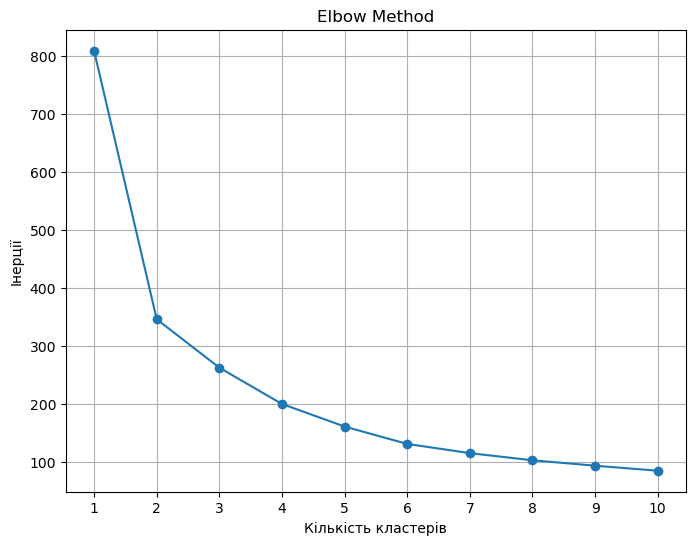

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерції')  # within cluster sum of squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

На графіку методу ліктя видно, що збільшення кількості кластерів веде до зменшення відстані від точок до центру їхнього кластера.
Логічно припускати, що кількість кластерів буде від 2 до 4. Проведемо дослідження.

In [44]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
cluster_labels = kmeans.fit_predict(df_2d_cleaned)

Візуалізуємо кластеризовані точки:

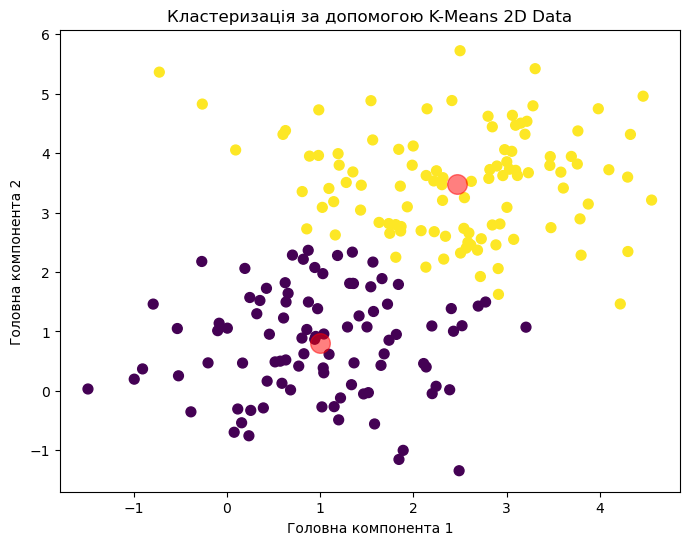

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(df_2d_cleaned.iloc[:, 0], df_2d_cleaned.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Кластеризація за допомогою K-Means 2D Data')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.show()

Як бачимо, то 2 кластери замало, тому давайте зробимо те саме, але вже з 4 кластерами:

In [46]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
cluster_labels = kmeans.fit_predict(df_2d_cleaned)

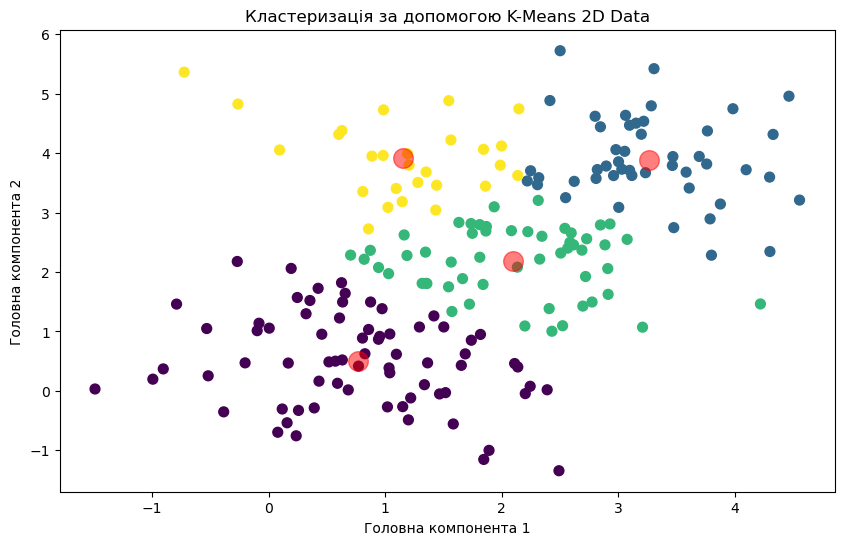

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(df_2d_cleaned.iloc[:, 0], df_2d_cleaned.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Кластеризація за допомогою K-Means 2D Data')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.show()

Бачимо вже набагато краще розподілення. Тому, мабуть, 4 кластери, це найоптимальніший варіант і показує чітке розділення даних на групи та координати центроїдів

Також спробуємо реалізувати кластеризацію за допомогою "продвинутого" та більш сучасного методу kmeans++ 

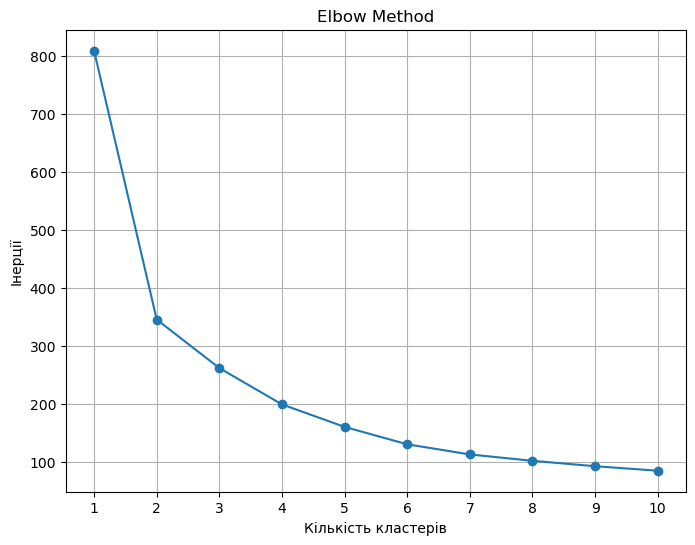

In [49]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_2d_cleaned)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерції')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

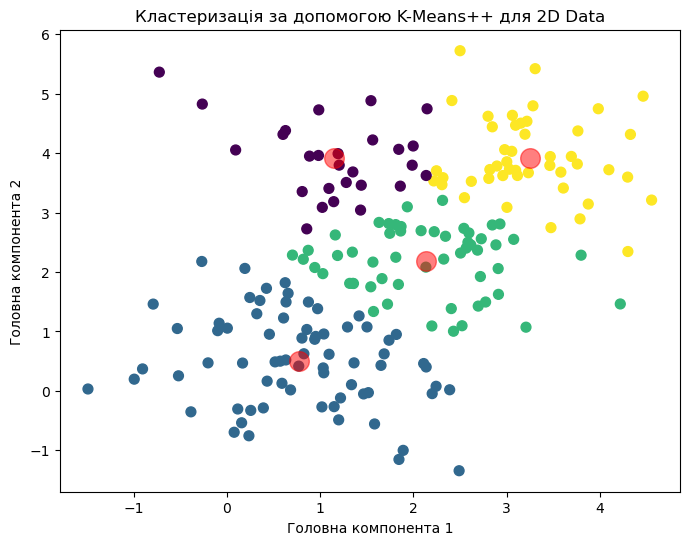

In [50]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_2d_cleaned)

plt.figure(figsize=(8, 6))
plt.scatter(df_2d_cleaned.iloc[:, 0], df_2d_cleaned.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Кластеризація за допомогою K-Means++ для 2D Data')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.show()

Як ми бачимо з графіків, вцілому обидва методи кластеризують по групах і видають очікуваний результат. Єдине можна побачити, що за допомогою kmeans++ трохи центральніше знаходяться координати центроїдів, що більш точно, як ми бачимо візуально.

Тепер перейдемо до роботи з датасетом mnist.csv. ще раз зчитаємо перші 5 рядків датасету:

In [51]:
df_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Як бачимо, в нас дуже дуже великий пласт даних, і нам потрібно скористатись алгоритмом PCA щоб зменшити розмірність наших даних до 2-вимірного варіанту.

Але спочатку давайте розділимо нашу вибірку на Х дані (тобто features) та y - тобто мітки класів:

In [52]:
X = df_mnist.drop(columns=df_mnist.columns[0])
y = df_mnist[df_mnist.columns[0]]

Тепер застосуємо алгоритм PCA для зменшення розмірності наших даних до 2-вимірного варіанту:

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca

array([[-7.58486799e+01, -1.04349783e+03],
       [-9.69402554e+02, -3.44770515e+02],
       [ 1.05412683e+03, -3.58661503e+02],
       [ 4.20938451e+02,  6.71104271e+02],
       [-1.00282509e+03, -3.02505723e+02],
       [-6.07918340e+01,  4.23331227e+02],
       [-1.72306332e+02,  4.36579785e+02],
       [ 1.82375697e+02,  1.75961778e+02],
       [ 9.31536673e+01,  5.52542592e+02],
       [ 9.50226158e+02, -1.01117464e+03],
       [ 3.58495671e+02, -3.30244422e+02],
       [ 6.12644409e+00,  9.38127779e+02],
       [ 1.08067761e+03, -3.57623371e+02],
       [-1.11596484e+03, -4.11884518e+02],
       [ 1.52759421e+02, -6.37698747e+02],
       [ 4.03676696e+02,  9.30052654e+02],
       [ 4.69781201e+00,  3.84926227e+02],
       [ 1.39593429e+02, -4.57342162e+02],
       [ 5.72669245e+01,  7.67841650e+02],
       [-2.63451345e+02,  3.41652616e+02],
       [ 3.12850201e+02, -1.17428483e+02],
       [-2.16206394e+01,  1.67699704e+02],
       [-8.29237689e+01, -9.91053637e+01],
       [-1.

А тепер використовуючи метод kmeans давайте кластеризуємо наш отриманий датасет.

Для цього спочатку давайте використаємо наш elbow method щоб розуміти, яка оптимальна кількість кластерів нам потрібна:

In [54]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

Візуалізуємо результати отриманих наших інерцій:

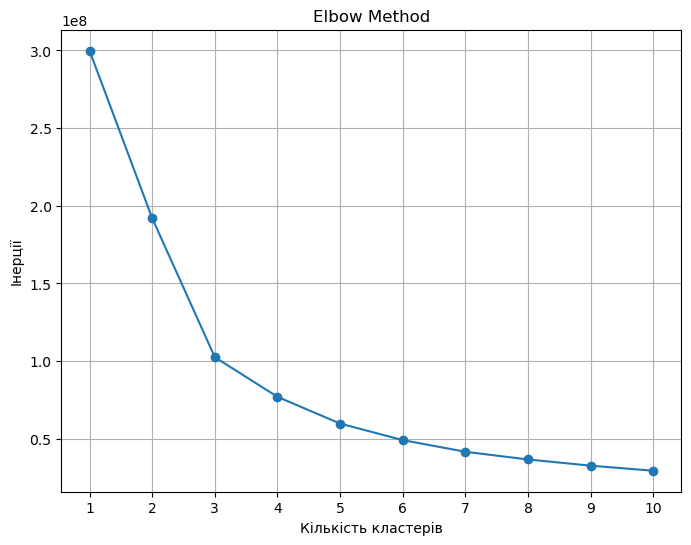

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерції')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Як бачимо з малюнку, оптимальною буде, мабуть, кількість кластерів рівна  між 3 або 5. Зараз перевіримо:

In [67]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

Візуалізуємо отримані результати на графіку:

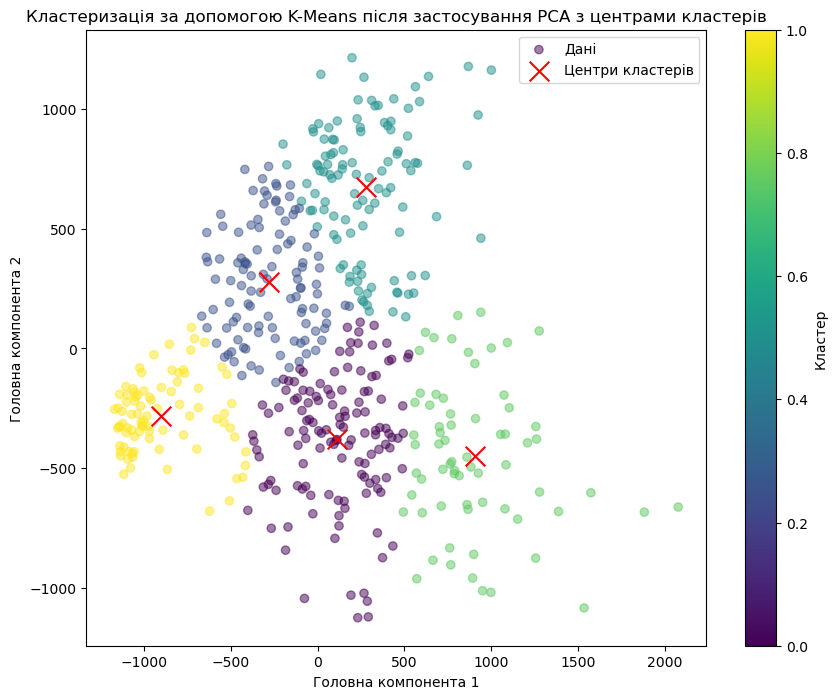

In [68]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5, label='Дані')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Центри кластерів')
plt.title('Кластеризація за допомогою K-Means після застосування PCA з центрами кластерів')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.colorbar(label='Кластер')
plt.legend()
plt.show()

На основі графіка методу ліктя здається, що інерція швидко знижується при збільшенні кількості кластерів від 1 до 3 або 4, і після цього зменшення стає менш різким. Це може вказувати на те, що оптимальна кількість кластерів лежить десь між 3 і 4, оскільки додавання додаткових кластерів не дає значного поліпшення у варіативності даних, що може бути охоплено кластерами.

Але коли я "погрався з цими даними" і візуалізував результати методу kmeans, то як на мене, візуально, все ж десь 5 кластерів це оптимальний варіант, який розбиває на оптимальну кількість кластерів з відповідними координатами центроїдів.